In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


- kc_house_data.csv - Dataset link: https://www.kaggle.com/shivachandel/kc-house-data
- default of credit card clients.csv - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Checks for data sets

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
kc = pd.read_csv("kc_house_data.csv")
cc = pd.read_csv("default of credit card clients.csv")

- At least 15 features (columns)
- At least 1000 instances (rows)

In [41]:
print("kc_house_data.csv",kc.shape)
print("default of credit card clients.csv",cc.shape)

kc_house_data.csv (21613, 22)
default of credit card clients.csv (30000, 25)


- At least two categorical/ordinal columns.


In [42]:
kc.info() #waterfront #view #condition - categorical # grade - ordinal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
Unnamed: 0       21613 non-null int64
id               21613 non-null int64
date             21613 non-null object
price            20308 non-null float64
bedrooms         21613 non-null int64
bathrooms        19386 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           20303 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              19511 non-null float64
long             19458 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(3)
m

In [43]:
cc.info() #EDUCATION - ordinal #MARRIAGE - Categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      26394 non-null object
AGE                           27594 non-null float64
PAY_REC_SEP                   30000 non-null int64
PAY_REC_AUG                   30000 non-null int64
PAY_REC_JUL                   27606 non-null float64
PAY_REC_JUN                   30000 non-null int64
PAY_REC_MAY                   30000 non-null int64
PAY_REC_APR                   30000 non-null int64
BILL_AMT_SEP                  30000 non-null int64
BILL_AMT_AUG                  30000 non-null int64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_MAY                  26358 non-null float64
BILL_AMT_APR   

- Between 5 to 10 percent missing values across the dataset. 

In [44]:
kc.isna().sum()/len(kc)*100

Unnamed: 0        0.000000
id                0.000000
date              0.000000
price             6.038033
bedrooms          0.000000
bathrooms        10.303984
sqft_living       0.000000
sqft_lot          0.000000
floors            6.061167
waterfront        5.899227
view              0.000000
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated      0.000000
zipcode           0.000000
lat               9.725628
long              9.970851
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [45]:
cc.isna().sum()/len(cc)*100

ID                             0.00
LIMIT_BAL                      0.00
SEX                            0.00
EDUCATION                      0.00
MARRIAGE                      12.02
AGE                            8.02
PAY_REC_SEP                    0.00
PAY_REC_AUG                    0.00
PAY_REC_JUL                    7.98
PAY_REC_JUN                    0.00
PAY_REC_MAY                    0.00
PAY_REC_APR                    0.00
BILL_AMT_SEP                   0.00
BILL_AMT_AUG                   0.00
BILL_AMT_JUL                   0.00
BILL_AMT_JUN                   0.00
BILL_AMT_MAY                  12.14
BILL_AMT_APR                   0.00
PAID_AMT_SEP                  11.84
PAID_AMT_AUG                   0.00
PAID_AMT_JUL                   0.00
PAID_AMT_JUN                   0.00
PAID_AMT_MAY                   0.00
PAID_AMT_APR                   0.00
default payment next month     0.00
dtype: float64

# Preprocessing of data

- NA imputations

In [4]:
# removing columns where Marriage is NA
cc = cc.dropna(subset=['MARRIAGE'])

# replacing NA with average age value in the data set
cc['AGE'] = cc['AGE'].fillna(float("{0:.0f}".format(cc['AGE'].mean())))

# putting zero in place of NA for PAY_REC_JUL & BILL_AMT_MAY because we can assume the payment was zero 
#  rather than removing the rows for these values
cc = cc.fillna(0)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26394 entries, 0 to 29997
Data columns (total 25 columns):
ID                            26394 non-null int64
LIMIT_BAL                     26394 non-null int64
SEX                           26394 non-null object
EDUCATION                     26394 non-null object
MARRIAGE                      26394 non-null object
AGE                           26394 non-null float64
PAY_REC_SEP                   26394 non-null int64
PAY_REC_AUG                   26394 non-null int64
PAY_REC_JUL                   26394 non-null float64
PAY_REC_JUN                   26394 non-null int64
PAY_REC_MAY                   26394 non-null int64
PAY_REC_APR                   26394 non-null int64
BILL_AMT_SEP                  26394 non-null int64
BILL_AMT_AUG                  26394 non-null int64
BILL_AMT_JUL                  26394 non-null int64
BILL_AMT_JUN                  26394 non-null int64
BILL_AMT_MAY                  26394 non-null float64
BILL_AMT_APR   

In [6]:
random.seed(123)
cc = cc.sample(frac=0.16)

In [7]:
print('label 0:', len(cc[cc['default payment next month'] == 0]))
print('label 1:', len(cc[cc['default payment next month'] == 1]))

label 0: 3305
label 1: 918


- Removing insignificant columns

In [8]:
cc = cc.drop(["ID"],axis=1)

In [9]:
cc["EDUCATION"] = cc["EDUCATION"].map( {'others' : 0, ' high_school' : 1, 'university' : 2, 'graduate_school' : 3} ).astype(int)

- Looking at below unique values one hot vector seems the right choice but the marriage with value as 'others' is very less (~1.2%) and doesnot make any intuition hence dropping rows with value as 'others'

In [10]:
print(cc["MARRIAGE"].unique())
print("Others",len(cc[cc['MARRIAGE'] == 'others']))
cc = cc[cc.MARRIAGE != "others"]
print(cc["MARRIAGE"].unique())
cc["MARRIAGE"] = cc["MARRIAGE"].map( {'single' : 0, 'married' : 1} ).astype(int)
cc["SEX"] = cc["SEX"].map( {'M' : 0, 'F' : 1} ).astype(int)

['married' 'single' 'others']
Others 52
['married' 'single']


In [14]:
cc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_REC_SEP,PAY_REC_AUG,PAY_REC_JUL,PAY_REC_JUN,PAY_REC_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAID_AMT_SEP,PAID_AMT_AUG,PAID_AMT_JUL,PAID_AMT_JUN,PAID_AMT_MAY,PAID_AMT_APR,default payment next month
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,...,4171.000000,4171.000000,4171.000000,4171.000000,4.171000e+03,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,170975.785183,0.593383,2.161112,0.469911,35.462479,-0.023016,-0.123232,-0.158715,-0.225605,-0.257492,...,42858.620954,35336.827619,38782.475905,4785.252697,6.852277e+03,5117.792376,4889.479022,4824.100935,5136.334692,0.216495
std,130502.927330,0.491261,0.745527,0.499154,8.694121,1.114090,1.184701,1.135954,1.158092,1.144841,...,63072.881321,57835.699140,58986.260814,13104.102072,3.334357e+04,14443.778626,17040.094508,16138.738633,17757.254883,0.411905
min,10000.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-57060.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,0.000000,2.000000,0.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2500.000000,150.000000,1323.000000,0.000000,1.000000e+03,462.000000,299.000000,316.000000,185.500000,0.000000
50%,140000.000000,1.000000,2.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19200.000000,11826.000000,16706.000000,2000.000000,2.005000e+03,1933.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,1.000000,3.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53716.000000,43865.000000,48876.500000,4917.500000,5.000000e+03,4734.500000,4136.000000,4100.500000,4005.000000,0.000000
max,780000.000000,1.000000,3.000000,1.000000,75.000000,8.000000,7.000000,8.000000,7.000000,7.000000,...,706864.000000,514114.000000,499100.000000,240101.000000,1.684259e+06,325000.000000,528897.000000,426529.000000,527143.000000,1.000000


In [12]:
y=cc['default payment next month']
cc_pr = cc.drop(['default payment next month'], axis=1)
X = cc_pr.as_matrix()

c:\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


# KNeighborsClassifier

In [15]:
train_array = []
test_array = []

for k in range(1,20):
    knn=KNeighborsClassifier(k)   
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

Text(0, 0.5, 'Accuracy (score)')

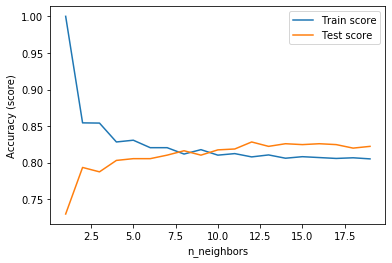

In [16]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, train_array, label = 'Train score')
plt.plot(x_axis, test_array, label = 'Test score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy (score)')

In [17]:
knn_w_best = KNeighborsClassifier(n_neighbors=11)
knn_w_best.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(knn_w_best.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(knn_w_best.score(X_test, y_test)))
KNN_pred = knn_w_best.predict(X_test)
confusion = confusion_matrix(y_test, KNN_pred)
print('\n\nKNN Classification \n', confusion)
print('\n\n\n',classification_report(y_test, KNN_pred))

Train set accuracy: 0.81
Test set accuracy: 0.82


KNN Classification 
 [[646  33]
 [118  36]]



               precision    recall  f1-score   support

           0       0.85      0.95      0.90       679
           1       0.52      0.23      0.32       154

   micro avg       0.82      0.82      0.82       833
   macro avg       0.68      0.59      0.61       833
weighted avg       0.79      0.82      0.79       833



In [18]:
scores = cross_val_score(knn,X_train,y_train, cv=8)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [0.80143541 0.80382775 0.79807692 0.79807692 0.79326923 0.80769231
 0.81009615 0.80048077]
Average cross-validation scroe: 0.80


# Logistic Regression

In [48]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

lg = GridSearchCV(LogisticRegression(multi_class = 'auto', max_iter = 10000), param_grid,cv=7)
lg.fit(X_train,y_train)

c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\s

c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\s

c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\s

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print(lg.best_params_)
print(lg.best_score_)
print(lg.scorer_)

{'C': 100, 'penalty': 'l1'}
0.8180455635491607
<function _passthrough_scorer at 0x0CC44CD8>


- It seems it is giving very high C value, so we checked the cv results to see how it varies with value with C for each iteration
- We can come to conclusion that we can use C with 1 and penalty with L1 as they are very close to the best parameters to save from *overfitting*

In [52]:
df = pd.DataFrame(lg.cv_results_)
dftest = df[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score"]]
dftest = pd.DataFrame(dftest.mean(axis=1),columns=['test_avg'])
dftrain = df[["split0_train_score","split1_train_score","split2_train_score","split3_train_score","split4_train_score","split5_train_score","split6_train_score"]]
dftrain = pd.DataFrame(dftest.mean(axis=1),columns=['train_avg'])
pd.concat([df[["param_C","param_penalty"]],dftest],axis=1)

,param_C,param_penalty,test_avg
0,0.001,l1,0.785373
1,0.001,l2,0.785373
2,0.01,l1,0.785373
3,0.01,l2,0.785373
4,0.1,l1,0.797958
5,0.1,l2,0.794364
6,1,l1,0.815951
7,1,l2,0.807854
8,10,l1,0.817147
9,10,l2,0.817147


In [53]:
lg_w_best = LogisticRegression(multi_class = 'auto', max_iter = 10000, C=1, penalty = 'l1')
lg_w_best.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.2f}'
     .format(lg_w_best.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(lg_w_best.score(X_test, y_test)))

LG_pred = lg_w_best.predict(X_test)
confusion = confusion_matrix(y_test, LG_pred)
print('\n\nLogistic Regression \n', confusion)
print('\n\n\n',classification_report(y_test, LG_pred))

Accuracy of logistic regression on training set: 0.82
Accuracy of logistic regression on test set: 0.83


Logistic Regression 
 [[632  16]
 [130  57]]



               precision    recall  f1-score   support

           0       0.83      0.98      0.90       648
           1       0.78      0.30      0.44       187

   micro avg       0.83      0.83      0.83       835
   macro avg       0.81      0.64      0.67       835
weighted avg       0.82      0.83      0.79       835



c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
scores = cross_val_score(lg_w_best,X_train,y_train, cv=5)

c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [0.80209895 0.78110945 0.81081081 0.81981982 0.80630631]
Average cross-validation scroe: 0.80


# Linear SVM

In [16]:
LSVM_params = {'C':[0.1, 1, 10, 100]}

In [18]:
LSVM = GridSearchCV(SVC(kernel='linear'), LSVM_params,cv=5)
LSVM.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [19]:
print(LSVM.best_params_)
print(LSVM.best_score_)
print(LSVM.scorer_)

{'C': 1}
0.815947242206235
<function _passthrough_scorer at 0x0CC44CD8>


In [54]:
LSVM_best = SVC(kernel='linear',C = 1)
LSVM_best.fit(X_train,y_train)

print('Accuracy of linear SVM on training set: {:.2f}'
     .format(LSVM_best.score(X_train, y_train)))
print('Accuracy of linear SVM on test set: {:.2f}'
     .format(LSVM_best.score(X_test, y_test)))

LSVM_pred = LSVM_best.predict(X_test)
confusion = confusion_matrix(y_test, LSVM_pred)
print('\n\nLinear SVM \n', confusion)
print('\n\n\n',classification_report(y_test, LSVM_pred))

Accuracy of linear SVM on training set: 0.82
Accuracy of linear SVM on test set: 0.83


Linear SVM 
 [[635  13]
 [132  55]]



               precision    recall  f1-score   support

           0       0.83      0.98      0.90       648
           1       0.81      0.29      0.43       187

   micro avg       0.83      0.83      0.83       835
   macro avg       0.82      0.64      0.66       835
weighted avg       0.82      0.83      0.79       835



In [21]:
scores = cross_val_score(SVC(kernel='linear',C=10),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.81287425 0.82758621 0.82008996 0.79910045 0.8155922 ]
Average cross-validation score: 0.82


# Kernelized SVM
- we will run for rbf and poly.
- kernel = linear is the linear svm

## rbf kernel

In [22]:
rbf_SVC_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma':[1,0.1,0.001,0.0001]}
rbf_SVC = GridSearchCV(SVC(kernel='rbf'), rbf_SVC_params,cv=5)
rbf_SVC.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
print(rbf_SVC.best_params_)
print(rbf_SVC.best_score_)
print(rbf_SVC.scorer_)

{'C': 100, 'gamma': 0.1}
0.8213429256594724
<function _passthrough_scorer at 0x0CC44CD8>


- It seems it is giving very high C value, so we checked the cv results to see how it varies with value with C for each iteration
- We can come to conclusion that we can use C with 1 and Gamma with 1 as they are very close to the best parameters to save from *overfitting*

In [24]:
df = pd.DataFrame(rbf_SVC.cv_results_)
dftest = df[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"]]
dftest = pd.DataFrame(dftest.mean(axis=1),columns=['test_avg'])
dftrain = df[["split0_train_score","split1_train_score","split2_train_score","split3_train_score","split4_train_score"]]
dftrain = pd.DataFrame(dftest.mean(axis=1),columns=['train_avg'])
pd.concat([df[["param_C","param_gamma"]],dftest],axis=1)

c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You

,param_C,param_gamma,test_avg
0,0.001,1,0.785372
1,0.001,0.1,0.785372
2,0.001,0.001,0.785372
3,0.001,0.0001,0.785372
4,0.01,1,0.785372
5,0.01,0.1,0.785372
6,0.01,0.001,0.785372
7,0.01,0.0001,0.785372
8,0.1,1,0.787170
9,0.1,0.1,0.785372


In [25]:
rbf_SVC_best = SVC(kernel='rbf',C = 1,gamma = 1)
rbf_SVC_best.fit(X_train,y_train)

print('Accuracy of rbf kernel SVM on training set: {:.2f}'
     .format(rbf_SVC_best.score(X_train, y_train)))
print('Accuracy of rbf kernel SVM on test set: {:.2f}'
     .format(rbf_SVC_best.score(X_test, y_test)))

rbf_SVC_pred = rbf_SVC_best.predict(X_test)
confusion = confusion_matrix(y_test, rbf_SVC_pred)
print('\n\n rbf kernel SVM \n', confusion)
print('\n\n\n',classification_report(y_test, rbf_SVC_pred))

Accuracy of rbf kernel SVM on training set: 0.82
Accuracy of rbf kernel SVM on test set: 0.82


 rbf kernel SVM 
 [[624  24]
 [130  57]]



               precision    recall  f1-score   support

           0       0.83      0.96      0.89       648
           1       0.70      0.30      0.43       187

   micro avg       0.82      0.82      0.82       835
   macro avg       0.77      0.63      0.66       835
weighted avg       0.80      0.82      0.79       835



In [26]:
scores = cross_val_score(SVC(kernel='rbf',C = 1,gamma = 1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.81137725 0.83658171 0.81109445 0.79610195 0.8095952 ]
Average cross-validation score: 0.81


## poly kernel

In [27]:
rbf_SVC_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'degree':[1,2,3,4,5]}
rbf_SVC = GridSearchCV(SVC(kernel='poly'), rbf_SVC_params,cv=5)
rbf_SVC.fit(X_train,y_train)

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chan

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print(rbf_SVC.best_params_)
print(rbf_SVC.best_score_)
print(rbf_SVC.scorer_)

{'C': 1000, 'degree': 2}
0.8198441247002398
<function _passthrough_scorer at 0x0CC44CD8>


- It seems it is giving very high C value, so we checked the cv results to see how it varies with value with C for each iteration
- We can come to conclusion that we can use C with 100 and Degree with 2 as they are very close to the best parameters

In [29]:
df = pd.DataFrame(rbf_SVC.cv_results_)
dftest = df[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"]]
dftest = pd.DataFrame(dftest.mean(axis=1),columns=['test_avg'])
dftrain = df[["split0_train_score","split1_train_score","split2_train_score","split3_train_score","split4_train_score"]]
dftrain = pd.DataFrame(dftest.mean(axis=1),columns=['train_avg'])
pd.concat([df[["param_C","param_degree"]],dftest],axis=1)

c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You

,param_C,param_degree,test_avg
0,0.001,1,0.785372
1,0.001,2,0.785372
2,0.001,3,0.785372
3,0.001,4,0.785372
4,0.001,5,0.785372
5,0.01,1,0.785372
6,0.01,2,0.785372
7,0.01,3,0.785372
8,0.01,4,0.785372
9,0.01,5,0.785372


In [30]:
poly_SVC_best = SVC(kernel='poly',C = 100,degree=2)
poly_SVC_best.fit(X_train,y_train)

print('Accuracy of poly kernel SVM  on training set: {:.2f}'
     .format(poly_SVC_best.score(X_train, y_train)))
print('Accuracy of poly linear SVM on test set: {:.2f}'
     .format(poly_SVC_best.score(X_test, y_test)))

poly_SVC_pred = poly_SVC_best.predict(X_test)
confusion = confusion_matrix(y_test, poly_SVC_pred)
print('\n\nPolynomial Kernel SVM \n', confusion)
print('\n\n\n',classification_report(y_test, poly_SVC_pred))

c:\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of poly kernel SVM  on training set: 0.82
Accuracy of poly linear SVM on test set: 0.83


Polynomial Kernel SVM 
 [[634  14]
 [131  56]]



               precision    recall  f1-score   support

           0       0.83      0.98      0.90       648
           1       0.80      0.30      0.44       187

   micro avg       0.83      0.83      0.83       835
   macro avg       0.81      0.64      0.67       835
weighted avg       0.82      0.83      0.79       835



In [31]:
scores = cross_val_score(SVC(kernel='rbf',C = 1,gamma = 1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.81137725 0.83658171 0.81109445 0.79610195 0.8095952 ]
Average cross-validation score: 0.81


# Decision Trees

In [32]:
param_grid = {'max_depth': [5, 10, 20, 50, 100]}

dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, return_train_score=True)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
print(dt.best_params_)
print(dt.best_score_)
print(dt.scorer_)

{'max_depth': 5}
0.8225419664268585
<function _passthrough_scorer at 0x0CC44CD8>


In [34]:
?DecisionTreeClassifier

In [35]:
dt_best = DecisionTreeClassifier(max_depth=5)
dt_best.fit(X_train,y_train)

print('Accuracy of decesion tree  on training set: {:.2f}'
     .format(poly_SVC_best.score(X_train, y_train)))
print('Accuracy of decesion tree on test set: {:.2f}'
     .format(poly_SVC_best.score(X_test, y_test)))

dt_pred = dt_best.predict(X_test)
confusion = confusion_matrix(y_test, dt_pred)
print('\n\nDecesion Tree \n', confusion)
print('\n\n\n',classification_report(y_test, dt_pred))

Accuracy of decesion tree  on training set: 0.82
Accuracy of decesion tree on test set: 0.83


Decesion Tree 
 [[619  29]
 [125  62]]



               precision    recall  f1-score   support

           0       0.83      0.96      0.89       648
           1       0.68      0.33      0.45       187

   micro avg       0.82      0.82      0.82       835
   macro avg       0.76      0.64      0.67       835
weighted avg       0.80      0.82      0.79       835



In [36]:
scores = cross_val_score(SVC(kernel='rbf',C = 1,gamma = 1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.81137725 0.83658171 0.81109445 0.79610195 0.8095952 ]
Average cross-validation score: 0.81


# Conclusion

In [56]:
con = pd.DataFrame(np.array([['KNN Classification','n_neighbors = 11',0.81,0.82],
                            ['Logistic Regression','C = 1, Penalty = L1',0.82,0.83],
                            ['Linear SVM','C = 1',0.82,0.83],
                            ['SVM Kernel - RBF','C = 1, gamma = 1',0.82,0.83],
                            ['SVM Kernel - Poly','C = 100, Degree = 2',0.82,0.83],
                            ['Decision Tree','max_depth = 5',0.82,0.83]]),columns= ['Model Name','Parameters','Train Score','Test Score'])
con

,Model Name,Parameters,Train Score,Test Score
0,KNN Classification,n_neighbors = 11,0.81,0.82
1,Logistic Regression,"C = 1, Penalty = L1",0.82,0.83
2,Linear SVM,C = 1,0.82,0.83
3,SVM Kernel - RBF,"C = 1, gamma = 1",0.82,0.83
4,SVM Kernel - Poly,"C = 100, Degree = 2",0.82,0.83
5,Decision Tree,max_depth = 5,0.82,0.83


### From the above table we can see that all models have similar score of 0.82 (+/- 0.01)

### We would like to go for Logistic Regression as it uses less computation power as compared to other Classification models
- The average cross validation score of Logistic Regression is 0.80